In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [3]:
anime_df=pd.read_csv('anime.csv')
anime_df.head(5)

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


here we only need anime_id, name and genre so we will drop the rest of the columns and as for ratings we have a seprate csv file

In [4]:
anime_df=anime_df.drop(columns=['type','episodes','rating','members'])

In [5]:
anime_df=anime_df.rename(columns={'name':'title'})

In [6]:
rating=pd.read_csv('rating.csv')
rating

,user_id,anime_id,rating
0,1,20,-1
1,1,24,-1
2,1,79,-1
3,1,226,-1
4,1,241,-1
5,1,355,-1
6,1,356,-1
7,1,442,-1
8,1,487,-1
9,1,846,-1


In [7]:
rating.user_id=rating.user_id.astype(str).astype(int)
rating.anime_id=rating.anime_id.astype(str).astype(int)
rating.rating=rating.rating.astype(str).astype(int)

In [8]:
new_users=rating.user_id.unique().shape[0]
new_animes=rating.anime_id.unique().shape[0]
new_ratings=len(rating)
#rpu ---> rating per user
avg_rpu=new_ratings/new_users

In [9]:
print('Number of unique users: ', new_users)
print('Number of unique animes: ', new_animes)
print('Number of total ratings: ', new_ratings)
print('Average number of ratings per user: ', avg_rpu)

Number of unique users:  73515
Number of unique animes:  11200
Number of total ratings:  7813737
Average number of ratings per user:  106.28765558049378


In [11]:
animeIndex=rating.groupby("anime_id").count().sort_values(by="rating",ascending=False)[0:3000].index
ratings2=rating[rating.anime_id.isin(animeIndex)]
rating.count()

user_id     7813737
anime_id    7813737
rating      7813737
dtype: int64

In [12]:
userIndex = ratings2.groupby("user_id").count().sort_values(by="rating",ascending=False).sample(n=3000, random_state=2020).index
ratings3 = ratings2[ratings2.user_id.isin(userIndex)]
ratings3.count()

user_id     304346
anime_id    304346
rating      304346
dtype: int64

In [13]:
animes=ratings3.anime_id.unique()
animesdf=pd.DataFrame(data=animes,columns=['originalanime_id'])
animesdf['newanime_id']=animesdf.index+1


In [14]:
users = ratings3.user_id.unique()
usersdf = pd.DataFrame(data=users,columns=['originaluser_id'])
usersdf['newuserid'] = usersdf.index+1
ratingdf = ratings3.merge(animesdf,left_on='anime_id',right_on='originalanime_id')
ratingdf.drop(labels='originalanime_id', axis=1, inplace=True)

In [15]:
ratingdf = ratingdf.merge(usersdf,left_on='user_id',right_on='originaluser_id')
ratingdf.drop(labels='originaluser_id', axis=1, inplace=True)

ratingdf.head()

,user_id,anime_id,rating,newanime_id,newuserid
0,17,6,7,1,1
1,17,19,10,2,1
2,17,30,9,3,1
3,17,32,10,4,1
4,17,43,8,5,1


In [16]:
new_users = ratingdf.user_id.unique().shape[0]
new_animes = ratingdf.anime_id.unique().shape[0]
new_ratings = len(ratingdf)
avg_rpu = new_ratings/new_users

In [17]:
print('Number of unique users: ', new_users)
print('Number of unique movies: ', new_animes)
print('Number of total ratings: ', new_ratings)
print('Average number of ratings per user: ', avg_rpu)

Number of unique users:  3000
Number of unique movies:  3000
Number of total ratings:  304346
Average number of ratings per user:  101.44866666666667


In [18]:
X_train, X_test = train_test_split(ratingdf, test_size=0.10, shuffle=True, random_state=2020)
X_validation, X_test = train_test_split(X_test, test_size=0.50, shuffle=True, random_state=2020)

In [19]:
print('Size of train set: ', len(X_train))
print('Size of validation set: ', len(X_validation))
print('Size of test set: ', len(X_test))

Size of train set:  273911
Size of validation set:  15217
Size of test set:  15218


In [21]:
ratings_train = np.zeros((new_users,new_animes))
for row in X_train.itertuples():
    ratings_train[row[5]-1, row[4]-1] = row[2]
ratings_train.shape

(3000, 3000)

In [22]:
sparsity = float(len(ratings_train.nonzero()[0]))
sparsity /= (ratings_train.shape[0] * ratings_train.shape[1])
sparsity *= 100
print('Sparsity: {:4.2f}%'.format(sparsity))

Sparsity: 3.04%


In [24]:
ratings_validation = np.zeros((new_users, new_animes))
for row in X_validation.itertuples():
    ratings_validation[row[5]-1, row[4]-1] = row[2]

In [26]:
ratings_test = np.zeros((new_users, new_animes))
for row in X_test.itertuples():
    ratings_test[row[5]-1, row[4]-1] = row[2]

In [27]:
sparsity = float(len(ratings_validation.nonzero()[0]))
sparsity /= (ratings_validation.shape[0] * ratings_validation.shape[1])
sparsity *= 100
print('Sparsity: {:4.2f}%'.format(sparsity))

Sparsity: 0.17%


In [28]:
class RBM(object):
    
    def __init__(self, input_size, output_size, 
                 learning_rate, epochs, batchsize):
        # Define hyperparameters
        self._input_size = input_size
        self._output_size = output_size
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.batchsize = batchsize
        
        # Initialize weights and biases using zero matrices
        self.w = np.zeros([input_size, output_size], dtype=np.float32)
        self.hb = np.zeros([output_size], dtype=np.float32)
        self.vb = np.zeros([input_size], dtype=np.float32)

    def prob_h_given_v(self, visible, w, hb):
        return tf.nn.sigmoid(tf.matmul(visible, w) + hb)

    def prob_v_given_h(self, hidden, w, vb):
        return tf.nn.sigmoid(tf.matmul(hidden, tf.transpose(w)) + vb)
    
    def sample_prob(self, probs):
        return tf.nn.relu(tf.sign(probs - tf.random_uniform(tf.shape(probs))))

    def train(self, X):
        _w = tf.placeholder(tf.float32, [self._input_size, self._output_size])
        _hb = tf.placeholder(tf.float32, [self._output_size])
        _vb = tf.placeholder(tf.float32, [self._input_size])
        
        prv_w = np.zeros([self._input_size, self._output_size], dtype=np.float32)
        prv_hb = np.zeros([self._output_size], dtype=np.float32)
        prv_vb = np.zeros([self._input_size], dtype=np.float32)
        
        cur_w = np.zeros([self._input_size, self._output_size], dtype=np.float32)
        cur_hb = np.zeros([self._output_size], dtype=np.float32)
        cur_vb = np.zeros([self._input_size], dtype=np.float32)
        
        v0 = tf.placeholder(tf.float32, [None, self._input_size])
        h0 = self.sample_prob(self.prob_h_given_v(v0, _w, _hb))
        v1 = self.sample_prob(self.prob_v_given_h(h0, _w, _vb))
        h1 = self.prob_h_given_v(v1, _w, _hb)
        
        positive_grad = tf.matmul(tf.transpose(v0), h0)
        negative_grad = tf.matmul(tf.transpose(v1), h1)
        
        update_w = _w + self.learning_rate * (positive_grad - negative_grad) / tf.to_float(tf.shape(v0)[0])
        update_vb = _vb +  self.learning_rate * tf.reduce_mean(v0 - v1, 0)
        update_hb = _hb +  self.learning_rate * tf.reduce_mean(h0 - h1, 0)
        
        err = tf.reduce_mean(tf.square(v0 - v1))
        
        error_list = []
        
        with tf.Session() as sess:
            sess.run(tf.global_variables_initializer())
            
            for epoch in range(self.epochs):
                for start, end in zip(range(0, len(X), self.batchsize),range(self.batchsize,len(X), self.batchsize)):
                    batch = X[start:end]
                    cur_w = sess.run(update_w, feed_dict={v0: batch, _w: prv_w, _hb: prv_hb, _vb: prv_vb})
                    cur_hb = sess.run(update_hb, feed_dict={v0: batch, _w: prv_w, _hb: prv_hb, _vb: prv_vb})
                    cur_vb = sess.run(update_vb, feed_dict={v0: batch, _w: prv_w, _hb: prv_hb, _vb: prv_vb})
                    prv_w = cur_w
                    prv_hb = cur_hb
                    prv_vb = cur_vb
                error = sess.run(err, feed_dict={v0: X, _w: cur_w, _vb: cur_vb, _hb: cur_hb})
                print ('Epoch: %d' % epoch,'reconstruction error: %f' % error)
                error_list.append(error)
            self.w = prv_w
            self.hb = prv_hb
            self.vb = prv_vb
            return error_list

    def rbm_output(self, X):
        
        input_X = tf.constant(X)
        _w = tf.constant(self.w)
        _hb = tf.constant(self.hb)
        _vb = tf.constant(self.vb)
        out = tf.nn.sigmoid(tf.matmul(input_X, _w) + _hb)
        hiddenGen = self.sample_prob(self.prob_h_given_v(input_X, _w, _hb))
        visibleGen = self.sample_prob(self.prob_v_given_h(hiddenGen, _w, _vb))
        with tf.Session() as sess:
            sess.run(tf.global_variables_initializer())
            return sess.run(out), sess.run(visibleGen), sess.run(hiddenGen)

In [29]:
inputX = ratings_train
inputX = inputX.astype(np.float32)
rbm=RBM(3000,3000,0.3,500,200)


In [30]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
from numpy import array
#inputx = array(inputX).reshape(1, 1000)
err = rbm.train(inputX)
outputX, reconstructedX, hiddenX = rbm.rbm_output(inputX)

Instructions for updating:
non-resource variables are not supported in the long term
Instructions for updating:
Use `tf.cast` instead.
Epoch: 0 reconstruction error: 4925307.000000
Epoch: 1 reconstruction error: 4925307.000000
Epoch: 2 reconstruction error: 4925307.000000
Epoch: 3 reconstruction error: 4925307.000000
Epoch: 4 reconstruction error: 4925307.000000
Epoch: 5 reconstruction error: 4925307.000000
Epoch: 6 reconstruction error: 4925307.000000
Epoch: 7 reconstruction error: 4925307.000000
Epoch: 8 reconstruction error: 4925307.000000
Epoch: 9 reconstruction error: 4925307.000000
Epoch: 10 reconstruction error: 4925307.000000
Epoch: 11 reconstruction error: 4925307.000000
Epoch: 12 reconstruction error: 4925307.000000
Epoch: 13 reconstruction error: 4925307.000000
Epoch: 14 reconstruction error: 4925307.000000
Epoch: 15 reconstruction error: 4925307.000000
Epoch: 16 reconstruction error: 4925307.000000
Epoch: 17 reconstruction error: 4925307.000000
Epoch: 18 reconstruction erro

Epoch: 162 reconstruction error: 4925307.000000
Epoch: 163 reconstruction error: 4925307.000000
Epoch: 164 reconstruction error: 4925307.000000
Epoch: 165 reconstruction error: 4925307.000000
Epoch: 166 reconstruction error: 4925307.000000
Epoch: 167 reconstruction error: 4925307.000000
Epoch: 168 reconstruction error: 4925307.000000
Epoch: 169 reconstruction error: 4925307.000000
Epoch: 170 reconstruction error: 4925307.000000
Epoch: 171 reconstruction error: 4925307.000000
Epoch: 172 reconstruction error: 4925307.000000
Epoch: 173 reconstruction error: 4925307.000000
Epoch: 174 reconstruction error: 4925307.000000
Epoch: 175 reconstruction error: 4925307.000000
Epoch: 176 reconstruction error: 4925307.000000
Epoch: 177 reconstruction error: 4925307.000000
Epoch: 178 reconstruction error: 4925307.000000
Epoch: 179 reconstruction error: 4925307.000000
Epoch: 180 reconstruction error: 4925307.000000
Epoch: 181 reconstruction error: 4925307.000000
Epoch: 182 reconstruction error: 4925307

Epoch: 333 reconstruction error: 4925307.000000
Epoch: 334 reconstruction error: 4925307.000000
Epoch: 335 reconstruction error: 4925307.000000
Epoch: 336 reconstruction error: 4925307.000000
Epoch: 337 reconstruction error: 4925307.000000
Epoch: 338 reconstruction error: 4925307.000000
Epoch: 339 reconstruction error: 4925307.000000
Epoch: 340 reconstruction error: 4925307.000000
Epoch: 341 reconstruction error: 4925307.000000
Epoch: 342 reconstruction error: 4925307.000000
Epoch: 343 reconstruction error: 4925307.000000
Epoch: 344 reconstruction error: 4925307.000000
Epoch: 345 reconstruction error: 4925307.000000
Epoch: 346 reconstruction error: 4925307.000000
Epoch: 347 reconstruction error: 4925307.000000
Epoch: 348 reconstruction error: 4925307.000000
Epoch: 349 reconstruction error: 4925307.000000
Epoch: 350 reconstruction error: 4925307.000000
Epoch: 351 reconstruction error: 4925307.000000
Epoch: 352 reconstruction error: 4925307.000000
Epoch: 353 reconstruction error: 4925307

In [33]:
inputValidation = ratings_validation
inputValidation = inputValidation.astype(np.float32)
finalOutput_validation, reconstructedOutput_validation, _ = rbm.rbm_output(inputValidation)

In [34]:
predictionsArray = reconstructedOutput_validation
pred_validation = predictionsArray[ratings_validation.nonzero()].flatten()
actual_validation = ratings_validation[ratings_validation.nonzero()].flatten()
rbm_prediction = mean_squared_error(pred_validation, actual_validation)
print('Mean squared error using RBM prediction:', rbm_prediction)

Mean squared error using RBM prediction: 164215695.8354472


Text(0, 0.5, 'Reconstruction Error')

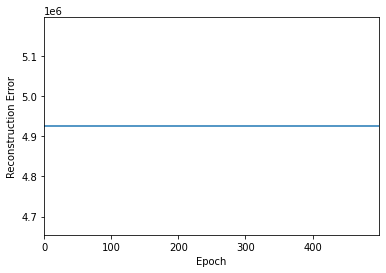

In [35]:
pd.Series(err).plot(logy=False)
plt.xlabel("Epoch")
plt.ylabel("Reconstruction Error")